<a href="https://colab.research.google.com/github/Prasanna2000/final-year-project/blob/main/Forest_Fire_Detection_Presentable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: [Prasanna Rahavendra A](https://github.com/Prasanna2000) , [Praneash GP](https://github.com/praneash456) , [Rashmika T]()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!unzip "/content/drive/MyDrive/Project/project_dataset_new.zip" -d "/content/data"

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/Data/Train_Data/Fire/F_1.jpg  
  inflating: /content/data/Data/Train_Data/Fire/F_10.jpg  
  inflating: /content/data/Data/Train_Data/Fire/F_100.jpg  
  inflating: /content/data/Data/Train_Data/Fire/F_1000.jpg  
  inflating: /content/data/Data/Train_Data/Fire/F_1001.jpg  
  inflating: /content/data/Data/Train_Data/Fire/F_1002.jpg  
  inflating: /content/data/Data/Train_Data/Fire/F_1003.jpg  
  inflating: /content/data/Data/Train_Data/Fire/F_1004.jpg  
  inflating: /content/data/Data/Train_Data/Fire/F_1005.jpg  
  inflating: /content/data/Data/Train_Data/Fire/F_1006.jpg  
  inflating: /content/data/Data/Train_Data/Fire/F_1007.jpg  
  inflating: /content/data/Data/Train_Data/Fire/F_1008.jpg  
  inflating: /content/data/Data/Train_Data/Fire/F_1009.jpg  
  inflating: /content/data/Data/Train_Data/Fire/F_101.jpg  
  inflating: /content/data/Data/Train_Data/Fire/F_1010.jpg  
  inflating: /content/data/Data/Train_Dat

# Web Scraping and Image Pre-Processing:

In [2]:
# web scraping code: https://github.com/Prasanna2000/final-year-project/tree/main/web%20scraping

In [ ]:
# Preprocessing and loading:

# classes: 0 if fire, 1 if not fire

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

train_data = []
train_labels = []

test_data = []
test_labels = []

img_ht = 192
img_wt = 192
train_dir = "/content/data/Data/Train_Data"
test_dir = "/content/data/Data/Test_Data"

for cls in ["Fire", "Non_Fire"]:
  for img in os.listdir(train_dir + "/" + cls):
    image = cv2.imread(train_dir + "/" + cls + "/" + img)
    if image is not None:
      image = cv2.resize(image, (img_ht, img_wt))
      train_data.append(image)
      train_labels.append(0 if cls=="Fire" else 1)

train_dir = "/content/data/Data/Train_Data"
for cls in ["Fire", "Non_Fire"]:
  for img in os.listdir(test_dir + "/" + cls):
    image = cv2.imread(test_dir + "/" + cls + "/" + img)
    if image is not None:
      image = cv2.resize(image, (img_ht, img_wt))
      test_data.append(image)
      test_labels.append(0 if cls=="Fire" else 1)

# print(len(train_data), len(train_labels))
# print(len(test_data), len(test_labels))

train_data = np.array(train_data)
train_labels = np.array(train_labels)

test_data = np.array(test_data)
test_labels = np.array(test_labels)

# Model Building (Training and Validation)

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Activation

In [5]:
data_dir = "/content/data/Data/"
train_dir = data_dir+"Train_Data/"
test_dir = data_dir+"Test_Data/"

img_height = 192
img_width = 192
batch_size = 32

### Model Flow:
<br/>
Input Layer &rarr; MobileNetV2 &rarr; Custom Layers &rarr; Activation &rarr; Output

In [19]:
mobilenet = tf.keras.applications.MobileNetV2(weights="imagenet", input_shape=(img_width,img_height,3), include_top=False)

mobilenet.trainable = False

model = tf.keras.Sequential([
        mobilenet,
        Flatten(),
        Dense(2048),
        Dense(1024, kernel_regularizer="l1"),
        Dense(512, kernel_regularizer="l1"),
        Dense(256, kernel_regularizer="l1"),
        Dense(128),
        Dense(1, activation="sigmoid")
])

model.compile(optimizer="adagrad",
             loss='binary_crossentropy',
             metrics=['accuracy'])

# print(mobilenet.summary())
# print(model.summary())

### Model Architecture:

In [20]:
# print("MobileNet Model:")
# tf.keras.utils.plot_model(mobilenet, to_file='/content/mobilenet.png')


Custom Model:


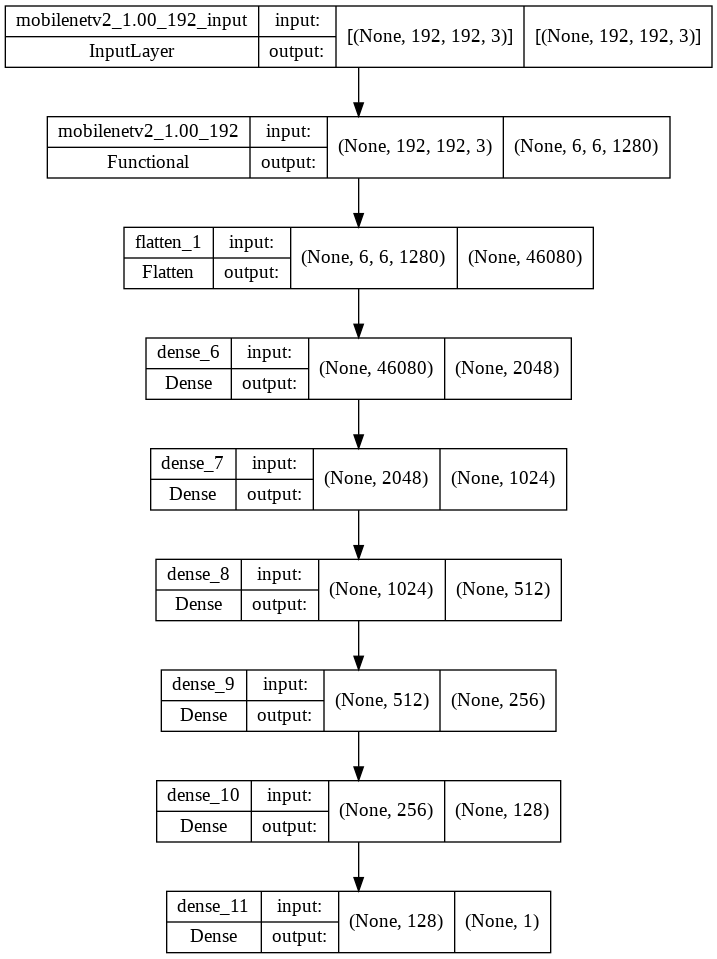

In [21]:
print("Custom Model:")
tf.keras.utils.plot_model(model, to_file='/content/model.png', show_shapes=True)


### Model Training for pre-determined number of iterations (Epochs):

In [9]:
history = model.fit(train_data, train_labels, validation_split = 0.2, epochs=100, shuffle=True)

Epoch 1/100
116/116 [==============================] - 149s 1s/step - loss: 213.4341 - accuracy: 0.8459 - val_loss: 204.1815 - val_accuracy: 0.2711
Epoch 2/100
116/116 [==============================] - 146s 1s/step - loss: 192.7722 - accuracy: 0.9037 - val_loss: 183.4706 - val_accuracy: 0.9729
Epoch 3/100
116/116 [==============================] - 146s 1s/step - loss: 175.2569 - accuracy: 0.9184 - val_loss: 167.3260 - val_accuracy: 0.7462
Epoch 4/100
116/116 [==============================] - 146s 1s/step - loss: 159.2926 - accuracy: 0.9338 - val_loss: 151.9278 - val_accuracy: 0.8395
Epoch 5/100
116/116 [==============================] - 148s 1s/step - loss: 144.6848 - accuracy: 0.9441 - val_loss: 138.2208 - val_accuracy: 0.7289
Epoch 6/100
116/116 [==============================] - 145s 1s/step - loss: 131.2948 - accuracy: 0.9528 - val_loss: 124.9615 - val_accuracy: 0.9165
Epoch 7/100
116/116 [==============================] - 145s 1s/step - loss: 119.0010 - accuracy: 0.9528 - val_lo

### Results:

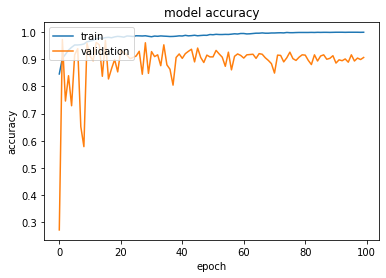

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

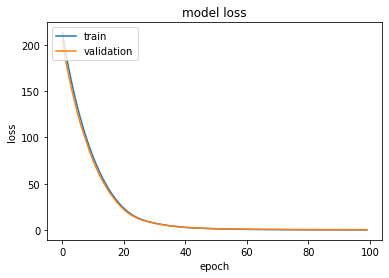

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    print("CONFUSION MATRIX:")

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        50
           1       0.94      0.92      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100




CONFUSION MATRIX:


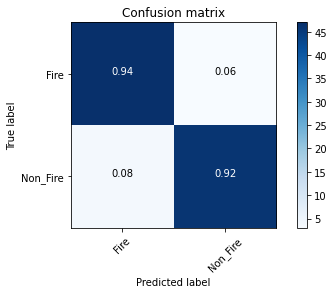

In [13]:
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix

raw_pred = model.predict(test_data)
y_pred = []

for i in raw_pred:
  y_pred.append(0 if i<0.5 else 1)

print("CLASSIFICATION REPORT:")
print(classification_report(test_labels, y_pred))

print("\n\n")
conf_mat = confusion_matrix(test_labels, y_pred)
plot_confusion_matrix(conf_mat, classes=["Fire", "Non_Fire"], normalize=True)

In [14]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 2s 551ms/step - loss: 0.3378 - accuracy: 0.9300


[0.3378490209579468, 0.9300000071525574]

### Sample Predictions

In [15]:
classes = {0:"Fire", 1:"No Fire"}

Image 1 prediction:  Fire


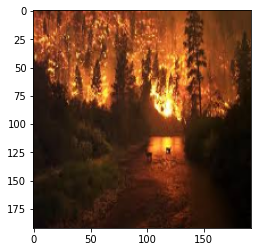

In [16]:
raw_img1 = cv2.resize(cv2.imread("/content/data/Data/Test_Data/Fire/F_12.jpg"), (192,192))
image_fire = np.expand_dims(raw_img1, axis=0)

pred = 0 if model.predict(image_fire) < 0.5 else 1

print("Image 1 prediction: ", classes[pred])
plt.imshow(cv2.cvtColor(raw_img1, cv2.COLOR_BGR2RGB))

plt.show()

Image 2 prediction:  No Fire


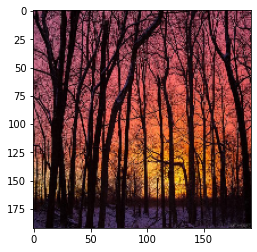

In [17]:
raw_img2 = cv2.resize(cv2.imread("/content/data/Data/Test_Data/Non_Fire/NF_17.jpg"), (192,192))

image_nofire = np.expand_dims(raw_img2, axis=0)
pred = 0 if model.predict(image_nofire) < 0.5 else 1
print("Image 2 prediction: ", classes[pred])
plt.imshow(cv2.cvtColor(raw_img2, cv2.COLOR_BGR2RGB))

plt.show()

In [18]:
model.save("/content/drive/MyDrive/Project/New_Model_Train99_Val91_Test93")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Project/New_Model_Train99_Val91_Test93/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Project/New_Model_Train99_Val91_Test93/assets
